**Assignment description**: Scrivere in Python una semplice funzione che implementi un filtro adattato (tipico Radar).
Supponga che il radar abbia trasmesso un segnale $w(n)$ ed abbia acquisito un corrispondente eco $s(n)$.
Al segnale ricevuto deve essere applicato un filtro che rappresenti la correlazione di $s(n)$ con $w(n)$.

Un filtro adattato, detto anche matched filter, è un di filtro lineare ottimale. Ovvero è in grado di massimizzare il signal to noise ratio $SNR$. Ovvero, dato un segnale in output $w(n)$, con $n$ rappresentante un intervallo di tempo discretizzato di cui prendiamo solo l'ennesima parte. Questo si propagherà nello spazio, raggiungerà un 'ostacolo' e verrà riflesso. Il segnale riflesso misurato, detto anche echo, non conterrà solo informazioni riguardanti il segnale emesso con un ritardo temporale, ma sarà anche caratterizzato dall'aggiunta di un rumore di fondo. Più quest'ultimo sarà elevato, minore sarà possibile distinguere il segnale in ritorno $s(n)$ dal rumore ambientale.
Per descrivere il segnale misurato al tempo $n$, $y(n)$, si esegue una convoluzione fra segnale in uscita ed eco misurato
$$
    y(n)=\sum_{k=-\infty}^{\infty} w(k)s(k+n)^* \\
    =\sum_{k=-\infty}^{\infty} w(k+n)^*s(k)
$$
Geometricamente il sergnale in input e output possono essere visti come dei vettori, di conseguenza la convoluzione di questi ultimi sarà massima quando i due saranno paralleli. Ciò accadrà quando ad un certo istante sarà misurato l'eco del segnale prodotto, che risulterà quindi essere 'ritardato'.
Per performare questo filtro lineare è possibile ricorrere alla matrice di autocorrelazione del rumore qunando quest'ultimo non è un rumore bianco. Però nel caso in cui viene rilevato il segnale riflesso e si conosce il segnale in uscita, è possibile implementare direttamente la relazione su scritta. A tale scopo si definisce la funzione 'matched_filter' in python. 

In [14]:
import numpy as np
def matched_filter( produced_signal, echo ):

    conjugate_func_filter = np.conjugate(produced_signal)
    signal_len = len(produced_signal)
    output_len = len(echo) - signal_len + 1
    output = np.zeros( output_len, dtype=complex)
    for i in range(output_len):
        segment = echo[i:i+signal_len]
        output[i] = np.dot(conjugate_func_filter, segment)
    return output

La funzione su descritta implementa la definizione di segnale in uscita come convoluzione dell'eco registrato e del segnale prodotto. A tale scopo si esegue il coniugato del vettore che rappresenta il segnale prodotto $w(n)$ e siccome si lavora con vettori di dimensione finita, sarà finita anche la somma di convoluzione che si va ad eseguire. Pertanto si calcola la grandezza del vettore ottenuto come convoluzione di $\underline{w}$ e $\underline{s}$ ad istanti differenti. Il vettore in output avrà lunghezza pari alla differenza della lunghezza dell'eco e del segnale prodotto, più uno. Quest'aggiunta è realizzata dal momento in cui in ambito informatico si inizia a contare dallo 0.
Generato un vettore **output** che sarebbe l'equivalente di $\underline{y}$ si esegue un ciclo for per andare ad assegnare un valore ad ogni elemento del vettore. Ogni elemento $i$-esimo sarà dato dal prodotto scalare di un vettore costruito prendendo gli elementi dell'intervallo $\left[i, i+len(\underline{s})\right]$, replicando lo sfasamento fra gli elementi dei due vettori descritto all'inizio.
Un'altra ragione per cui si costruisce questo terzo vettore è dovuto alla differenza in ampiezza fra gli eventuali vettori di eco e di segnale prodotto. 

**Test della funzione costruita per un segnale sinusoidale** 


Consideriamo un segnale prodotto di tipo sinusoidale
$$
    e^{ikx}= cos(kx) + i \cdot sin(kx)
$$

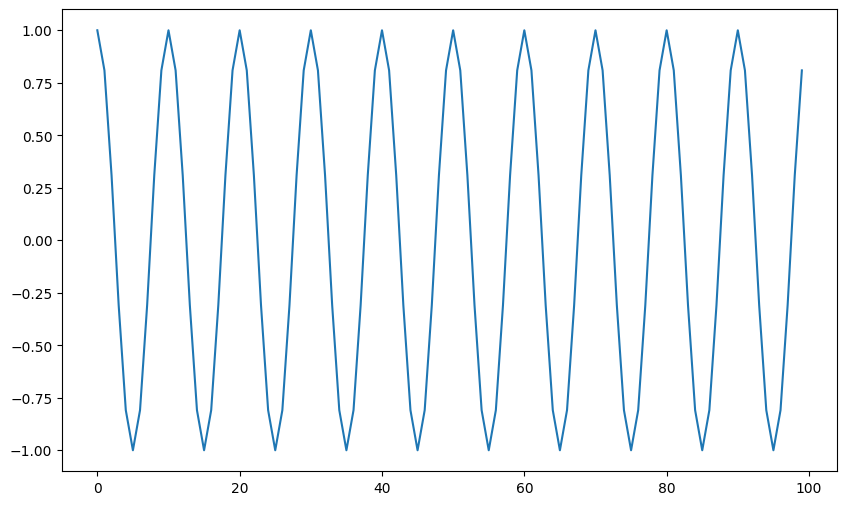

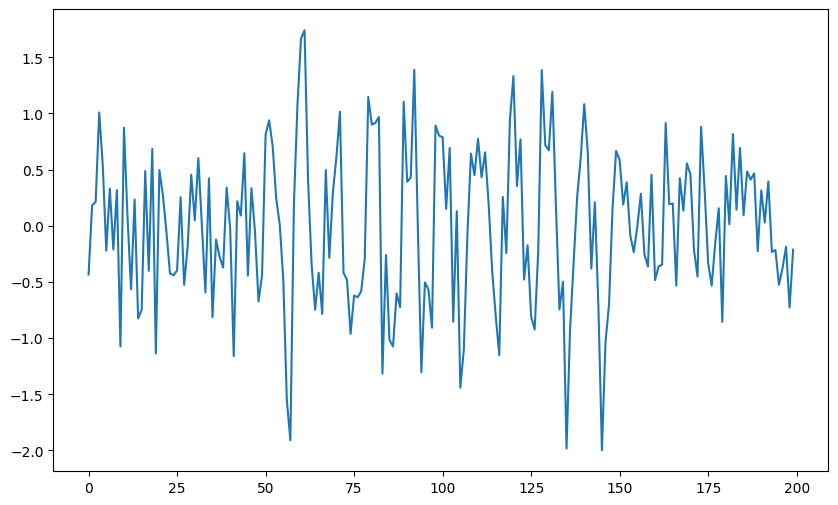

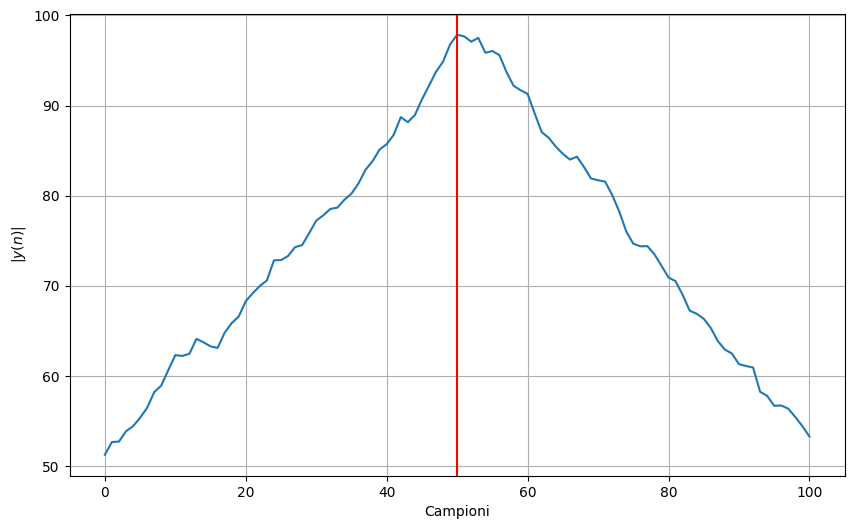

In [64]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0,100) #suddividiamo l'intervallo di tempo in cui il segnale è generato ed emesso in 50 intervalli di uguale lunghezza
w = np.exp(2*1j*np.pi*n*0.1) #simuliamo il segnale prodotto

#Mostriamo la parte reale del segnale prodotto
plt.figure(figsize=(10, 6))
plt.plot(np.real(w))
plt.show()

#supponiamo di ricevere un sengale con rumore
delay = 50
echo = np.zeros(len(n)+2*delay, dtype=complex)
echo[delay:delay+len(w)] = w
echo+= 0.5 * (np.random.randn(len(echo))+1j*np.random.randn(len(echo)))

#Mostriamo la parte reale dell'eco misurato
plt.figure(figsize=(10, 6))
plt.plot(np.real(echo))
plt.show()

#Applichiamo il filtro
y = matched_filter(w, echo)

plt.figure(figsize=(10, 6))
plt.plot(np.abs(y))
plt.axvline(x=delay, color="red")
plt.xlabel("Campioni")
plt.ylabel("$|y(n)|$")
plt.grid()
plt.show()

**Test con segnale prodotto gaussiano**
Se il segnale prodotto è di forma gaussiana, nello specifico se è caratterizzato da una distribuzione centrata nell'origine e con varianza 1:
$$
    \mathcal{N}(x|0, 1) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$
osserviamo che il filtro continua a funzionare, anche se in modo più 'impreciso' rispetto al caso precedente.

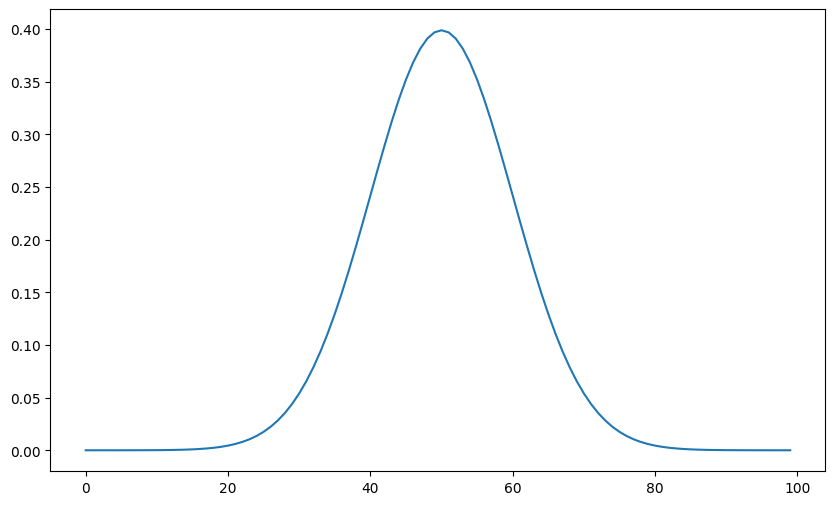

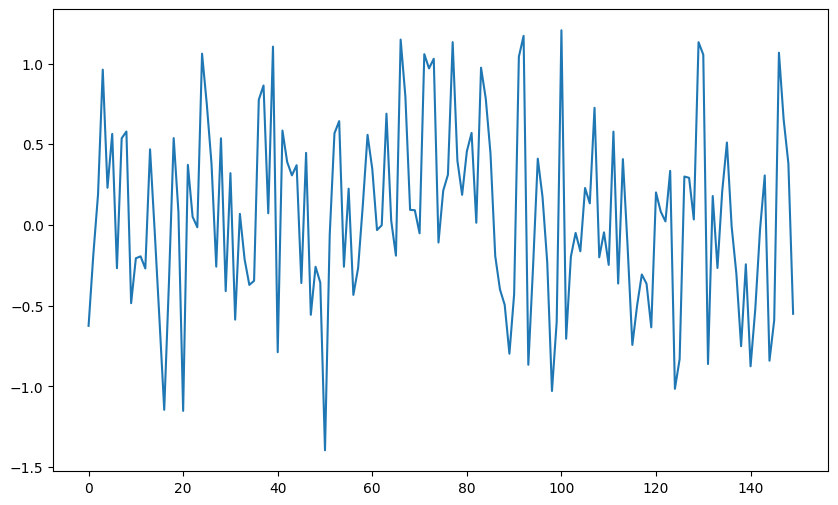

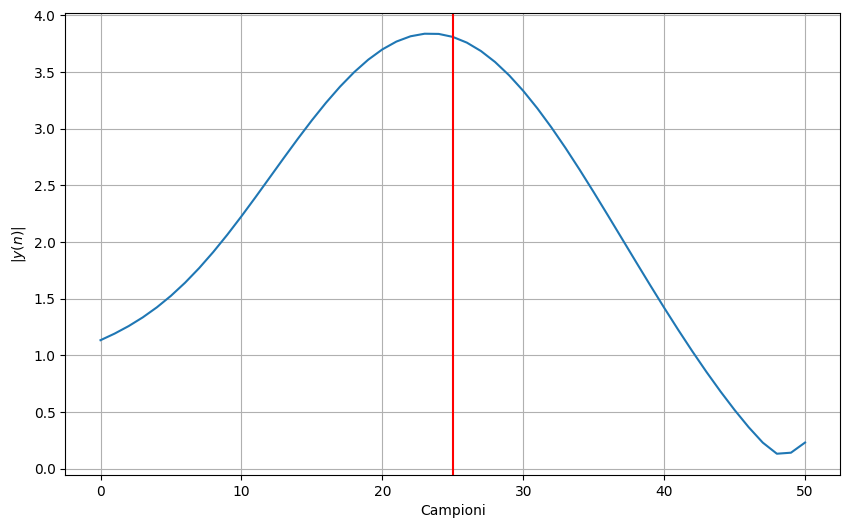

In [68]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-50, 50)
w = (1/np.sqrt(2*np.pi))*np.exp(-0.1*0.1*n*n*0.5)

delay = 75

#Mostriamo la parte reale del segnale prodotto
plt.figure(figsize=(10, 6))
plt.plot(w)
plt.show()

echo = np.zeros(len(n)+ 2*delay, dtype=complex)
echo[delay:delay+len(w)] = w
echo+= 0.5 * (np.random.randn(len(echo))+1j*np.random.randn(len(echo)))

#Mostriamo la parte reale dell'eco misurato
plt.figure(figsize=(10, 6))
plt.plot(np.real(echo))
plt.show()

#Applichiamo il filtro
y = matched_filter(w, echo)

plt.figure(figsize=(10, 6))
plt.plot(np.abs(y))
plt.axvline(x=delay, color="red")
plt.xlabel("Campioni")
plt.ylabel("$|y(n)|$")
plt.grid()
plt.show()